In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [49]:
#importing the data
file_path = "C:/Users/megal/Downloads/sanju guvi/individual+household+electric+power+consumption/household_power_consumption.txt"
#Spliting the data
df = pd.read_csv(file_path,sep = ';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
#saved it to csv file
df.to_csv('C:/Users/megal/Downloads/powerpulse.csv')

In [ ]:
#checking howmany rows in data
print(df.shape[0])


2075259


In [50]:
#general information about the data
#And checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
#the numerical columns are in object type 

In [51]:
#finding the null values
df[df['Global_active_power'] == '?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [52]:
#droping the null values
df.dropna(inplace = True)

In [ ]:
#df['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].mode()[0])

In [ ]:
#df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
#changing the datatype
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])
df['Voltage'] = pd.to_numeric(df['Voltage'])
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'])
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'])
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'])

In [54]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [ ]:
#conclusion ->
#All the columns are changed to appropiate datatype

In [56]:
#statistical analysis
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
"""
Conculstion ->
1.in the Global_active_power column,mean is significantly  greater than median implying that data is right skewed(outliers in right tail).
2.in the Global_reactive_power column,mean is significantly greater than median implying that data is right skewed(outliers in right tail).
3.in the Voltage column,we have voltage in the range of 2.232000e to 2.541500e,with mean almost equal to median implying that the data is symmetric.
4.in the Global_intensity column,mean is significantly greater than median implying that data is right skewed(outliers in right tail).
5.in the Sub_metering_1 column,mean is significantly greater than median implying that data is right skewed(outliers in right tail).
6.in the Sub_metering_2 column,mean is significantly greater than median implying that data is right skewed(outliers in right tail).
7.in the Sub_metering_3 column,mean is significantly greater than median implying that data is right skewed(outliers in right tail).
"""

In [ ]:
#getting an idea whether there are  any null values in the data
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [58]:
#getting the idea about the duplicate entries in the data
df.duplicated().sum()

np.int64(0)

In [ ]:
#droping an null values
df.drop(['Date','Time'],inplace = True,axis = 1)

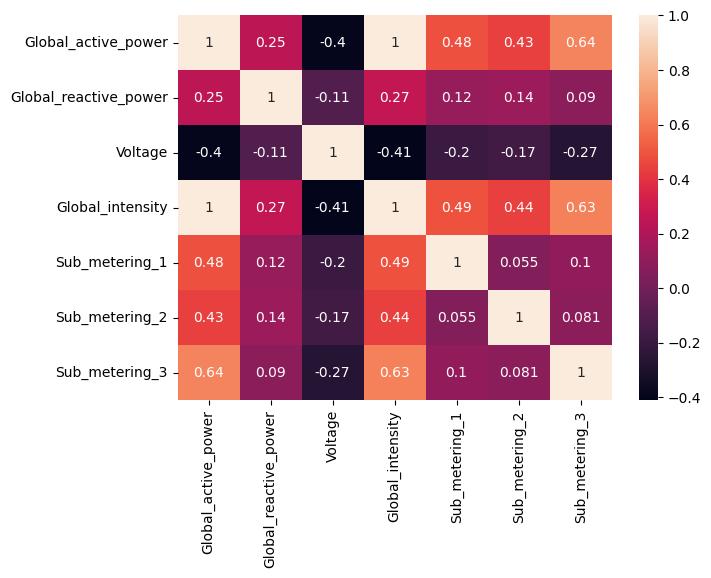

In [ ]:
#Multicollinearity test (Pearson's Correlation Coefficient)
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
"""
conculsion ->
1.Global_active_power and Global_intensity has perfect positive correlationship.
2.Global_active_power and Sub_metering_3 has modreate postive correlationship.
3.Global_intensity and Sub_metering_3 have a moderate positive correlationship.
4.Date and Time is uncorrelated.
5.Global_active_power and Voltage have moderate negative correlationship.
6.Global_intensity and Voltage have moderate negative correlationship.
7.Global_reactive_power and Global_intensity have weak positive correlationship.          
"""

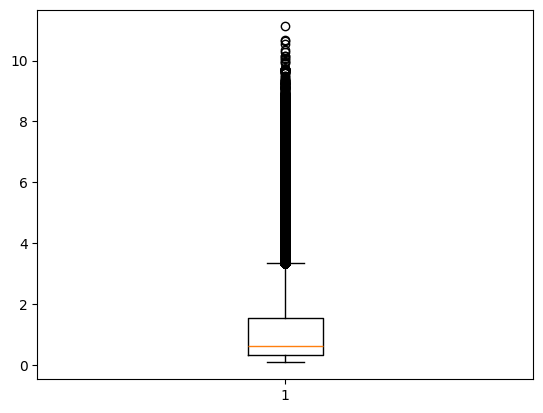

In [ ]:
#identifying the outliers in the data
plt.boxplot(df['Global_active_power'])
plt.show()

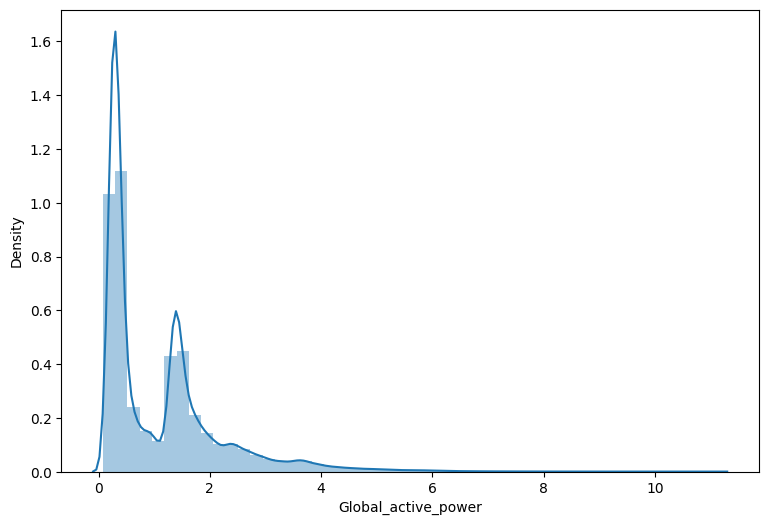

In [63]:
plt.figure(figsize = (9,6))
sns.distplot(df['Global_active_power'],bins = 50,kde = True)
plt.show()

In [ ]:
#df = df[df['Global_active_power'] < 2]
#df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
211,16/12/2006,20:55:00,1.832,0.170,237.54,8.4,0.0,0.0,17.0
218,16/12/2006,21:02:00,1.692,0.054,238.72,7.8,0.0,0.0,18.0
229,16/12/2006,21:13:00,1.766,0.058,237.70,8.2,0.0,0.0,18.0
234,16/12/2006,21:18:00,1.876,0.074,238.63,8.6,0.0,0.0,18.0
243,16/12/2006,21:27:00,1.848,0.112,238.59,8.4,0.0,0.0,18.0


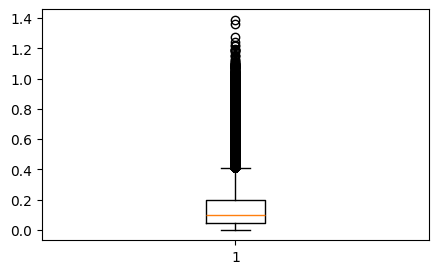

In [65]:
plt.figure(figsize = (5,3))
plt.boxplot(df['Global_reactive_power'])
plt.show()

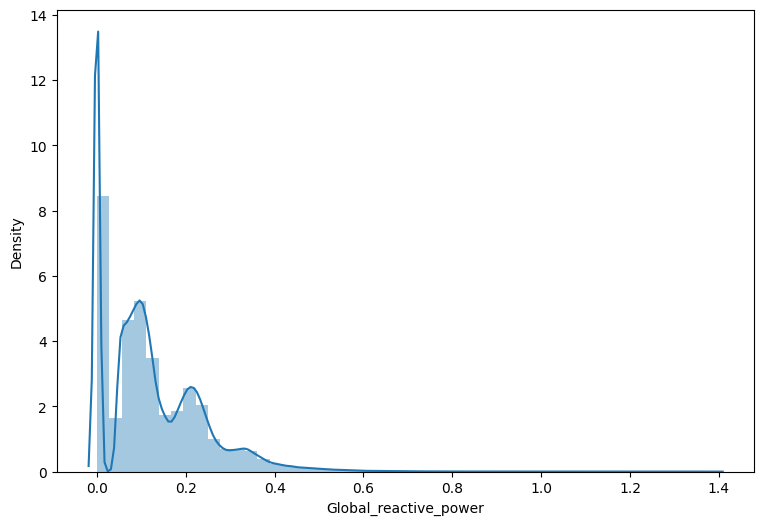

In [66]:
plt.figure(figsize = (9,6))
sns.distplot(df['Global_reactive_power'],bins = 50,kde = True)
plt.show()

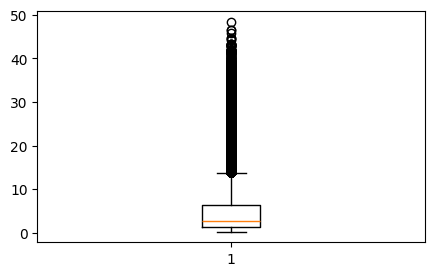

In [67]:
plt.figure(figsize = (5,3))
plt.boxplot(df['Global_intensity'])
plt.show()

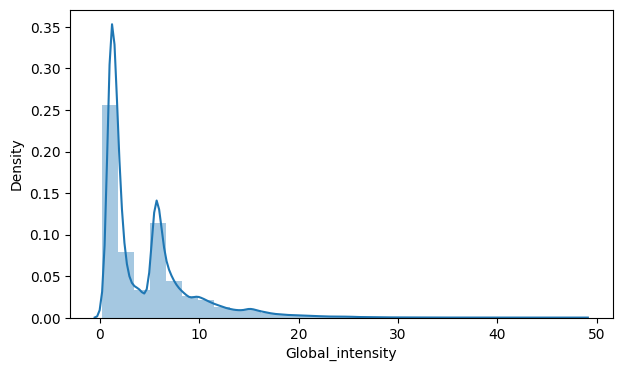

In [68]:
plt.figure(figsize = (7,4))
sns.distplot(df['Global_intensity'],bins = 30,kde=True)
plt.show()

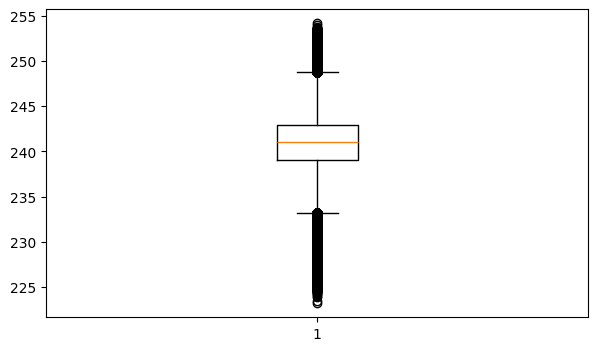

In [69]:
plt.figure(figsize = (7,4))
plt.boxplot(df['Voltage'])
plt.show()

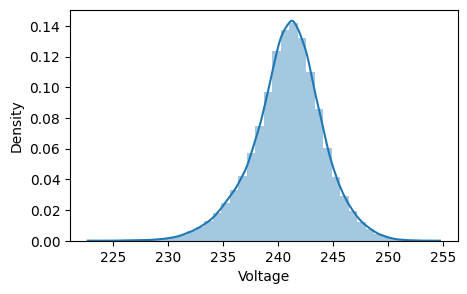

In [70]:
plt.figure(figsize = (5,3))
sns.distplot(df['Voltage'],bins = 40,kde = True)
plt.show()

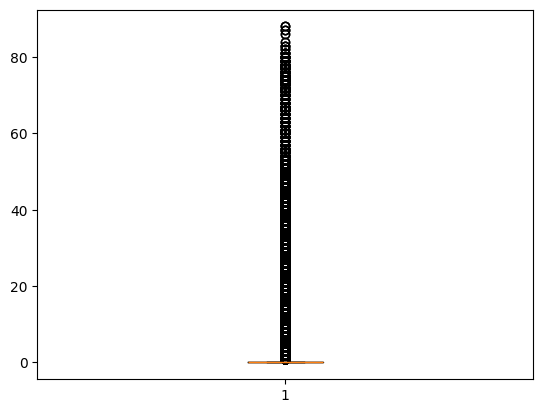

In [71]:
plt.boxplot(df['Sub_metering_1'])
plt.show()

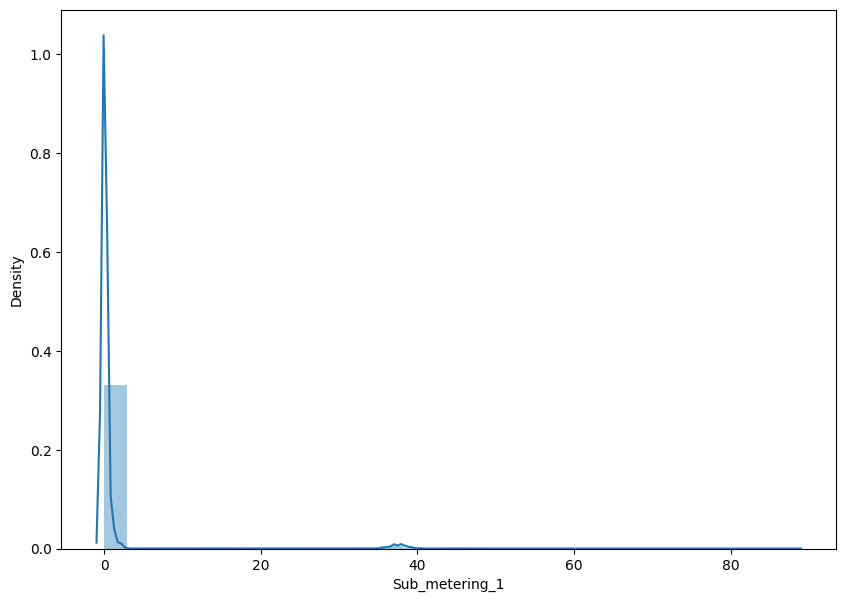

In [72]:
plt.figure(figsize = (10,7))
sns.distplot(df['Sub_metering_1'],bins = 30,kde = True)
plt.show()

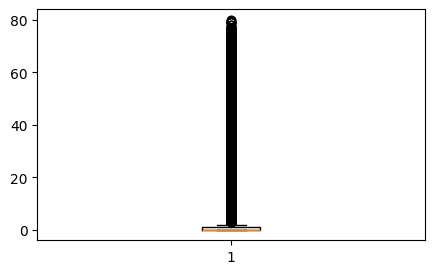

In [73]:
plt.figure(figsize = (5,3))
plt.boxplot(df['Sub_metering_2'])
plt.show()

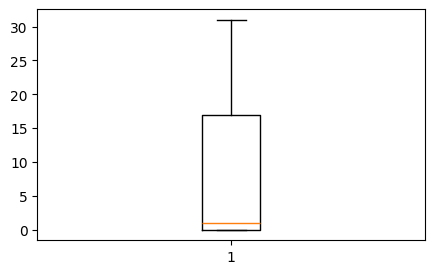

In [74]:
plt.figure(figsize = (5,3))
plt.boxplot(df['Sub_metering_3'])
plt.show()

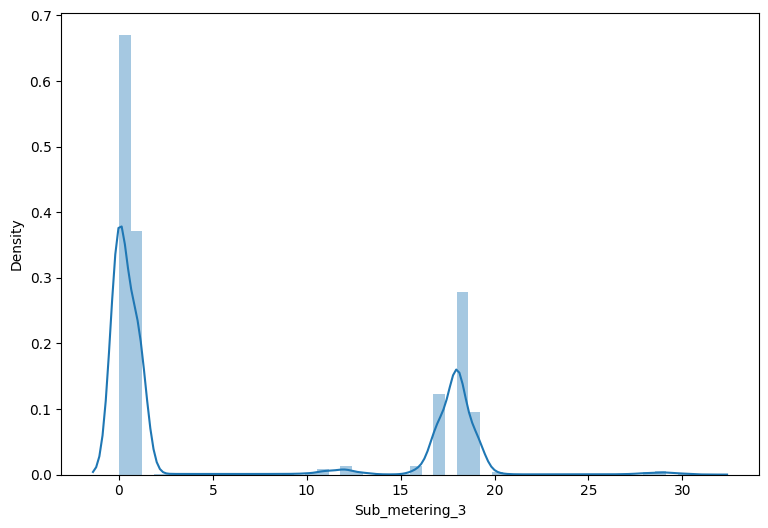

In [93]:
plt.figure(figsize = (9,6))
sns.distplot(df['Sub_metering_3'],bins = 50,kde = True)
plt.show()

In [ ]:
#seperating input features
x = df.drop('Global_active_power',axis = 1)

In [77]:
#standardscaling 
scaler = StandardScaler().fit_transform(df)

In [78]:
scaler

array([[ 2.95507706,  2.61072061, -1.85181608, ..., -0.18233673,
        -0.05127425,  1.24942076],
       [ 4.03708463,  2.77040557, -2.2252745 , ..., -0.18233673,
        -0.05127425,  1.13089735],
       [ 4.05032598,  3.32043153, -2.33021323, ..., -0.18233673,
         0.12048729,  1.24942076],
       ...,
       [-0.14529076, -1.09751893, -0.31477235, ..., -0.18233673,
        -0.22303579, -0.7654772 ],
       [-0.149074  , -1.09751893, -0.35180955, ..., -0.18233673,
        -0.22303579, -0.7654772 ],
       [-0.15096563, -1.09751893, -0.39810605, ..., -0.18233673,
        -0.22303579, -0.7654772 ]])

In [79]:
#determining the principal compoenents 
pca = PCA(n_components = 4)
principalcomponents = pca.fit_transform(x)

In [80]:
#getting the dataframe
pca_df = pd.DataFrame(data = principalcomponents,columns = ['PC1','PC2','PC3','PC4'])
final_df = pd.concat([pca_df,df['Global_active_power']],axis = 1)
final_df.head()

,PC1,PC2,PC3,PC4,Global_active_power
0,15.061476,-1.207391,0.846331,-6.322943,4.216
1,16.189063,0.531665,1.275359,-8.238285,5.360
2,17.268664,0.570994,2.057809,-8.274245,5.374
3,17.036514,0.103780,1.210435,-7.992311,5.388
4,13.916006,-1.967867,0.635747,-5.170846,3.666


In [ ]:
#explained variance ratio
pca.explained_variance_ratio_

array([0.49273193, 0.23767632, 0.19300259, 0.05265329])

In [111]:
49.27 +23.76+19.3+5.26

97.59

In [22]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [82]:
#seperating spliting input and output data
x = df.drop('Global_active_power',axis = 1)
y = df['Global_active_power']

#performing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 45)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#initalializing the model
LR = LinearRegression()

#fitting the modl
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
#taking the prediction from the model
y_train_pred = LR.predict(x_train)
y_pred = LR.predict(x_test)

In [ ]:
#model evulation on training data
print("Training RMSE :",np.round(np.sqrt(metrics.mean_squared_error(y_train_pred,y_train)),5))
print("Training MAE :",np.round(np.sqrt(metrics.mean_absolute_error(y_train_pred,y_train)),5))
print("Training R2 Score :",np.round(metrics.r2_score(y_train_pred,y_train),2))

#model evulation on testing data
print("\nTesting RMSE :",np.round(np.sqrt(metrics.mean_squared_error(y_pred,y_test)),5))
print("Testing MAE :",np.round(np.sqrt(metrics.mean_absolute_error(y_pred,y_test)),5))
print("Testing R2 Score :",np.round(metrics.r2_score(y_pred,y_test),5))


Training RMSE : 0.04059
Training MAE : 0.16098
Training R2 Score : 1.0

Testing RMSE : 0.04073
Testing MAE : 0.16083
Testing R2 Score : 0.9985


In [86]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()

clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [88]:
y_train_pred = clf.predict(x_train)
y_pred = clf.predict(x_test)

In [ ]:
#model evaluating the model on training data
print("Training RMSE :",np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),5))
print("Training r2 score :",np.round(np.sqrt(metrics.r2_score(y_train,y_train_pred)),5))

#model evulation on testing data
print("\nTesting RMSE :",np.round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),5))
print("Testing r2 score :",np.round(np.sqrt(metrics.r2_score(y_test,y_pred)),5))

Training RMSE : 0.00916
Training r2 score : 0.99996

Testing RMSE : 0.0425
Testing r2 score : 0.99919


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [92]:
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)

In [ ]:
print("Training RMSE :",np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),5))
print("Training r2 score :",np.round(np.sqrt(metrics.r2_score(y_train,y_train_pred)),5))


print("\nTesting RMSE :",np.round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),5))
print("Testing r2 score :",np.round(np.sqrt(metrics.r2_score(y_test,y_pred)),5))

Training RMSE : 0.01453
Training r2 score : 0.99991

Testing RMSE : 0.03292
Testing r2 score : 0.99951


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
#training the classifier
clf = GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [98]:
#taking prediction from model
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

In [ ]:
print("Training RMSE :",np.round(np.sqrt(metrics.root_mean_squared_error(y_train,y_train_pred)),5))
print("Training R2 score :",np.round(np.sqrt(metrics.r2_score(y_train,y_train_pred)),5))
print("Training MAE :",np.round(np.sqrt(metrics.mean_absolute_error(y_train,y_train_pred)),5))

print("\nTesting RMSE :",np.round(np.sqrt(metrics.root_mean_squared_error(y_test,y_pred)),5))
print("Testing r2 score :",np.round(np.sqrt(metrics.r2_score(y_test,y_pred)),5))
print("Training MAE :",np.round(np.sqrt(metrics.mean_absolute_error(y_train,y_train_pred)),5))

Training RMSE : 0.18554
Training R2 score : 0.99947
Training MAE : 0.14692

Testing RMSE : 0.18644
Testing r2 score : 0.99946
Training MAE : 0.14692


                                                                ~THNAK YOU~